In [127]:
import pandas as pd
import numpy as np

In [128]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.head()

,sqft,floors,bedrooms,bathrooms,price
0,5650,1.0,3,1.00,221900.0
1,7242,2.0,3,2.25,538000.0
2,10000,1.0,2,1.00,180000.0
3,5000,1.0,4,3.00,604000.0
4,8080,1.0,3,2.00,510000.0


In [129]:
data = np.array(raw_data)

In [130]:
no_of_examples = data.shape[0]
no_of_features = data.shape[1]-1

In [131]:
no_train = int(0.8*no_of_examples)
no_train

17290

In [132]:
X_train = data[:no_train,:-1]
y_train = data[:no_train,-1]
X_test = data[no_train:,:-1]
y_test = data[no_train:,-1].reshape(-1,1)

In [133]:
X_mean = np.mean(X_train,axis=0)
X_std = np.std(X_train,axis=0)
X_train = (X_train - X_mean)/X_std
X_test = (X_test-X_mean)/X_std

In [134]:
y_mean = np.mean(y_train,axis=0)
y_std = np.std(y_train,axis=0)
y_train = (y_train - y_mean)/y_std

In [135]:
class Linear_model:
    def __init__(self,m,X,y):
        #self.W = np.zeros((m,1))
        self.W = np.random.rand(m,1)
        self.b = 0
        self.X = X
        self.N = X.shape[0]
        self.y = y.reshape((self.N,1))
        
        
    def train(self, lr = 0.1, reg = 0):
        pred = (self.X).dot(self.W) + self.b
        err = pred - self.y
        err2 = err**2
        loss = np.sum(err2)/self.N
        loss += reg*np.sum(self.W**2)
        
        grad = (self.X).T.dot(err)
        grad *= 2/self.N
        
        grad += 2*reg*self.W
        
        self.W -= lr*grad
        self.b -= lr*np.sum(err)*2/self.N
        
        return loss
    
    def evaluate(self,X_test):
        return (X_test).dot(self.W) + self.b      
        
        
        

In [136]:
lrs = [0.001,0.002,0.005,0.01,0.02,0.05,0.08,0.1]

In [137]:
no_of_epochs = 1000
loss_linear = []
linear_params = {}
for l in lrs:
    model = Linear_model(no_of_features, X_train,y_train)
    for i in range(no_of_epochs):
        loss = model.train(lr=l)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    loss_linear.append(test_loss)
    linear_params[l] = (model.W,model.b)
print("Linear Combination of features")
for i in range(len(lrs)):
    print("Learning Rate: "+str(lrs[i])+", Test Loss: \t",loss_linear[i])

Linear Combination of features
Learning Rate: 0.001, Test Loss: 	 324296.64875
Learning Rate: 0.002, Test Loss: 	 321337.192672
Learning Rate: 0.005, Test Loss: 	 315227.686107
Learning Rate: 0.01, Test Loss: 	 314939.116649
Learning Rate: 0.02, Test Loss: 	 314935.644301
Learning Rate: 0.05, Test Loss: 	 314935.642707
Learning Rate: 0.08, Test Loss: 	 314935.642707
Learning Rate: 0.1, Test Loss: 	 314935.642707


In [138]:
import matplotlib.pyplot as plt

Text(0,0.5,'RMSE')

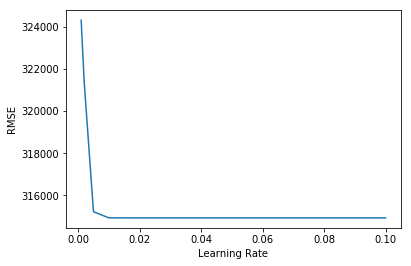

In [139]:
%matplotlib inline
plt.plot(lrs,loss_linear)
plt.xlabel("Learning Rate")
plt.ylabel("RMSE")

In [140]:
X_train_q = data[:no_train,:-1]
y_train_q = data[:no_train,-1]
X_test_q = data[no_train:,:-1]
y_test_q = data[no_train:,-1].reshape(-1,1)
for i in range(no_of_features):
    for j in range(i,no_of_features):
        new = X_train_q[:,i]*X_train_q[:,j]
        new = new.reshape(new.shape[0],1)
        X_train_q = np.concatenate((X_train_q,new),axis=1)
        new = X_test_q[:,i]*X_test_q[:,j]
        new = new.reshape(new.shape[0],1)
        X_test_q = np.concatenate((X_test_q,new),axis=1)
        
X_mean_q = np.mean(X_train_q,axis=0)
X_std_q = np.std(X_train_q,axis=0)
X_train_q = (X_train_q - X_mean_q)/X_std_q
X_test_q = (X_test_q-X_mean_q)/X_std_q

y_mean_q = np.mean(y_train_q,axis=0)
y_std_q = np.std(y_train_q,axis=0)
y_train_q = (y_train_q - y_mean_q)/y_std_q

#print(X_train_q.shape,X_test_q.shape,y_train_q.shape,y_test_q.shape)

In [141]:
no_of_epochs = 1000
no_of_features_q = X_train_q.shape[1]
losses = {}
loss_quad = []
quad_params = {}
for l in lrs:
    model = Linear_model(no_of_features_q, X_train_q,y_train_q)
    losses[l] = []
    for i in range(no_of_epochs):
        loss = model.train(lr=l)
        losses[l].append(loss)
    pred_test = model.evaluate(X_test_q)
    pred_test = pred_test*y_std_q + y_mean_q
    #test_loss = np.sqrt(np.sum((np.square(pred_test - y_test_q)))/X_test_q.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test_q)))
    loss_quad.append(test_loss)
    quad_params[l] = (model.W,model.b)
print("Quadratic Combination of features")
for i in range(len(lrs)):
    print("Learning Rate: "+str(lrs[i])+", Test Loss: \t",loss_quad[i])

Quadratic Combination of features
Learning Rate: 0.001, Test Loss: 	 316463.628618
Learning Rate: 0.002, Test Loss: 	 311210.395074
Learning Rate: 0.005, Test Loss: 	 306569.323985
Learning Rate: 0.01, Test Loss: 	 303928.714119
Learning Rate: 0.02, Test Loss: 	 303489.892187
Learning Rate: 0.05, Test Loss: 	 303833.429295
Learning Rate: 0.08, Test Loss: 	 303257.391293
Learning Rate: 0.1, Test Loss: 	 303174.056711


Text(0,0.5,'RMSE')

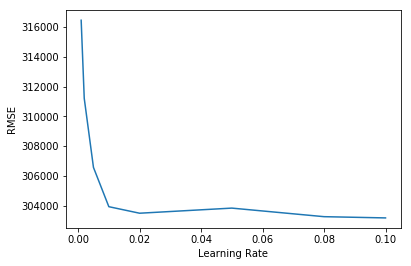

In [142]:
plt.plot(lrs,loss_quad)
plt.xlabel("Learning Rate")
plt.ylabel("RMSE")

In [143]:
X_train_c = data[:no_train,:-1]
y_train_c = data[:no_train,-1]
X_test_c = data[no_train:,:-1]
y_test_c = data[no_train:,-1].reshape(-1,1)
for i in range(no_of_features):
    for j in range(i,no_of_features):
        for k in range(j,no_of_features):
            new = X_train_c[:,i]*X_train_c[:,j]
            new = new.reshape(new.shape[0],1)
            X_train_c = np.concatenate((X_train_c,new),axis=1)
            new = X_test_c[:,i]*X_test_c[:,j]
            new = new.reshape(new.shape[0],1)
            X_test_c = np.concatenate((X_test_c,new),axis=1)
        
X_mean_c = np.mean(X_train_c,axis=0)
X_std_c = np.std(X_train_c,axis=0)
X_train_c = (X_train_c - X_mean_c)/X_std_c
X_test_c = (X_test_c-X_mean_c)/X_std_c

y_mean_c = np.mean(y_train_c,axis=0)
y_std_c = np.std(y_train_c,axis=0)
y_train_c = (y_train_c - y_mean_c)/y_std_c

#print(X_train_c.shape,X_test_c.shape,y_train_c.shape,y_test_c.shape)

In [144]:
no_of_epochs = 1000
no_of_features_c = X_train_c.shape[1]
losses = {}
loss_cube = []
cub_params = {}
for l in lrs:
    model = Linear_model(no_of_features_c, X_train_c,y_train_c)
    losses[l] = []
    for i in range(no_of_epochs):
        loss = model.train(lr=l)
        losses[l].append(loss)
    pred_test = model.evaluate(X_test_c)
    pred_test = (pred_test)*y_std_c + y_mean_c
    #test_loss = np.sqrt(np.sum((np.square(pred_test - y_test_q)))/X_test_q.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test_c)))
    loss_cube.append(test_loss)
    cub_params[l] = (model.W,model.b)
print("Linear Combination of features")
for i in range(len(lrs)):
    print("Learning Rate: "+str(lrs[i])+", Test Loss: \t",loss_cube[i])

Linear Combination of features
Learning Rate: 0.001, Test Loss: 	 312044.153217
Learning Rate: 0.002, Test Loss: 	 312710.873313
Learning Rate: 0.005, Test Loss: 	 307818.941928
Learning Rate: 0.01, Test Loss: 	 306645.943339
Learning Rate: 0.02, Test Loss: 	 304472.676446
Learning Rate: 0.05, Test Loss: 	 303483.686151
Learning Rate: 0.08, Test Loss: 	 303244.720328
Learning Rate: 0.1, Test Loss: 	 303221.456756


Text(0,0.5,'RMSE')

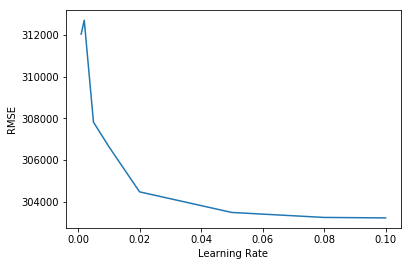

In [145]:
plt.plot(lrs,loss_cube)
plt.xlabel("Learning Rate")
plt.ylabel("RMSE")

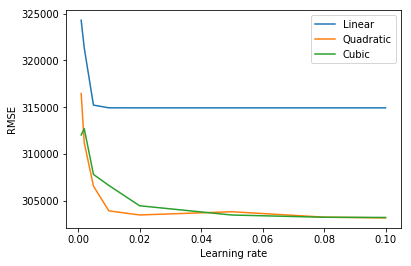

In [146]:
lin_, = plt.plot(lrs,loss_linear)
sqr_, = plt.plot(lrs,loss_quad)
cub_, = plt.plot(lrs,loss_cube)
plt.xlabel("Learning rate")
plt.ylabel("RMSE")
plt.legend([lin_, sqr_,cub_],["Linear","Quadratic","Cubic"])
plt.savefig("1c_TestRMSEvsLearningRate.png")

**Preferred Combination of Features :** As is evident from the plot of different Learning rates vs Test RMSE, quadratic combination for function seems to work better compared to both Linear and Cubic combinations in general.

In [147]:
print("Linear Combination of Features\n")
for (key,val) in linear_params.items():
    print("Learning Rate: ",key)
    print("W: ",val[0].T)
    print("B: ",val[1])
    print()

Linear Combination of Features

Learning Rate:  0.001
W:  [[ 0.13023408  0.13590333  0.22919323  0.2583774 ]]
B:  5.70262942324e-17

Learning Rate:  0.002
W:  [[ 0.05824802  0.1252119   0.14044848  0.32352888]]
B:  8.5284854174e-17

Learning Rate:  0.005
W:  [[ 0.04443523  0.03732991  0.05413245  0.466231  ]]
B:  1.37413376096e-16

Learning Rate:  0.01
W:  [[ 0.04291138  0.02818548  0.04481385  0.4814436 ]]
B:  1.38894872083e-16

Learning Rate:  0.02
W:  [[ 0.04288976  0.02805764  0.04467967  0.48165951]]
B:  1.3887021473e-16

Learning Rate:  0.05
W:  [[ 0.04288975  0.02805758  0.04467961  0.48165961]]
B:  1.38142822803e-16

Learning Rate:  0.08
W:  [[ 0.04288975  0.02805758  0.04467961  0.48165961]]
B:  1.38968844144e-16

Learning Rate:  0.1
W:  [[ 0.04288975  0.02805758  0.04467961  0.48165961]]
B:  1.39190760325e-16



In [148]:
print("Quadratic Combination of Features\n")
for (key,val) in quad_params.items():
    print("Learning Rate: ",key)
    print("W: ",val[0].T)
    print("B: ",val[1])
    print()

Quadratic Combination of Features

Learning Rate:  0.001
W:  [[ 0.0180407  -0.5335147  -0.22125778  0.20548923 -0.06729786 -0.31175639
   0.07035724  0.33039539  0.18623357  0.38477806  0.27250281  0.14035198
  -0.12611893  0.17145546]]
B:  1.09226527957e-16

Learning Rate:  0.002
W:  [[ 0.44468439 -0.1720388  -0.33131643  0.10648573 -0.04516709 -0.07796143
  -0.12445444 -0.1815536  -0.1026485   0.33474652  0.12575811  0.17851654
   0.02228346  0.38785292]]
B:  1.43183607763e-16

Learning Rate:  0.005
W:  [[ 0.01232917  0.35860985  0.09880835 -0.12728462 -0.04723773  0.16502405
   0.12653775 -0.23388354 -0.09151423 -0.22818411 -0.13437211 -0.04043717
   0.19912148  0.60369519]]
B:  9.67071676899e-17

Learning Rate:  0.01
W:  [[ 0.28812432 -0.13241587 -0.12094905 -0.00575959 -0.03356024  0.00440327
  -0.19040588 -0.0445494   0.04665895  0.3779656  -0.24882752  0.00141676
  -0.05599396  0.70188312]]
B:  8.32062392767e-17

Learning Rate:  0.02
W:  [[ 0.11463857 -0.07834634 -0.0229218  -0.

In [149]:
print("Cubic Combination of Features\n")
for (key,val) in cub_params.items():
    print("Learning Rate: ",key)
    print("W: ",val[0].T)
    print("B: ",val[1])
    print()

Cubic Combination of Features

Learning Rate:  0.001
W:  [[ 0.25977922  0.36657341 -0.11131576  0.0381969  -0.25985316 -0.07308772
   0.2562231  -0.10098219 -0.19131803 -0.16865699  0.0459678   0.14289665
   0.18502473 -0.07623825 -0.22217098 -0.24805118  0.29546638 -0.08058951
   0.03446264 -0.08810948 -0.42985175  0.41026233  0.44246752  0.14679672]]
B:  1.38278643725e-16

Learning Rate:  0.002
W:  [[ 0.05961119 -0.34899338  0.06495774  0.40987408 -0.13222216  0.18839273
  -0.24255342  0.16995915 -0.3409491   0.2601234   0.20451579  0.17634073
  -0.2887499  -0.0170577   0.23189535  0.2281567  -0.31812565 -0.1606393
   0.24222977  0.24186803 -0.17022154  0.16065619 -0.10076056  0.05250802]]
B:  8.81068882784e-17

Learning Rate:  0.005
W:  [[ 0.20448823 -0.04190484 -0.18505977  0.14383748  0.18140436  0.15361629
  -0.49019693  0.13178417  0.0779908  -0.01817264  0.19774877 -0.15091538
  -0.05862735 -0.202978    0.19502746 -0.03441413 -0.18870501  0.09494492
   0.12121597 -0.14077256  0